<a href="https://colab.research.google.com/github/primaldy/Proyek-Casptone-Eksplorasi-Wawasan-Dari-Dataset-Penyakit-Jantung-UCI/blob/main/Proyek_Casptone_Eksplorasi_Wawasan_Dari_Dataset_Penyakit_Jantung_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYEK CAPSTONE: EKSPLORASI WAWASAN DARI DATASET PENYAKIT JANTUNG UCI**

Notebook ini berisi langkah-langkah untuk mengeksplorasi dataset Heart Disease UCI, menemukan pola dan wawasan, serta menggunakan LLM (IBM Granite IBM Granite 3.3 8B Instruct via Replicate) untuk meringkas dan menjelaskan temuan.

In [2]:
# 1. INSTALASI DAN IMPOR PUSTAKA
# ------------------------------------------------------------------------------
print("1. Menginstal pustaka yang diperlukan...")
!pip install replicate matplotlib seaborn pandas

import pandas as pd
import replicate
import os
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk mengakses secrets di Google Colab
from google.colab import userdata


1. Menginstal pustaka yang diperlukan...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.7 MB/s eta 0:00:00


In [3]:
# 2. KONFIGURASI API REPLICATE
# ------------------------------------------------------------------------------
print("\n2. Mengkonfigurasi API Replicate...")
try:
    # Mengambil token API dari Colab secrets
    REPLICATE_API_TOKEN = userdata.get('api_token')
    os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN
    print("Token API Replicate berhasil diakses dari Colab secrets.")
except userdata.SecretNotFoundError:
    print("Kesalahan: 'api_token' tidak ditemukan di Colab secrets.")
    print("Pastikan Anda telah menambahkannya dan mengaktifkan 'Notebook access'.")
    REPLICATE_API_TOKEN = None


2. Mengkonfigurasi API Replicate...
Token API Replicate berhasil diakses dari Colab secrets.


In [6]:
## 3. PEMUATAN DATA
# ------------------------------------------------------------------------------
print("\n3. Memuat dataset dari URL...")
# Menggunakan URL dataset yang disediakan
dataset_url = "https://raw.githubusercontent.com/primaldy/Proyek-Casptone-Eksplorasi-Wawasan-Dari-Dataset-Penyakit-Jantung-UCI/refs/heads/main/heart_cleveland_upload.csv"

try:
    df = pd.read_csv(dataset_url)
    print("Dataset berhasil dimuat dari URL! Ukuran dataset:", df.shape)
except Exception as e:
    print(f"Kesalahan: Gagal memuat dataset dari URL. {e}")
    df = None




3. Memuat dataset dari URL...
Dataset berhasil dimuat dari URL! Ukuran dataset: (297, 14)



4. Eksplorasi Data Awal (EDA)

5 Baris Pertama Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 n

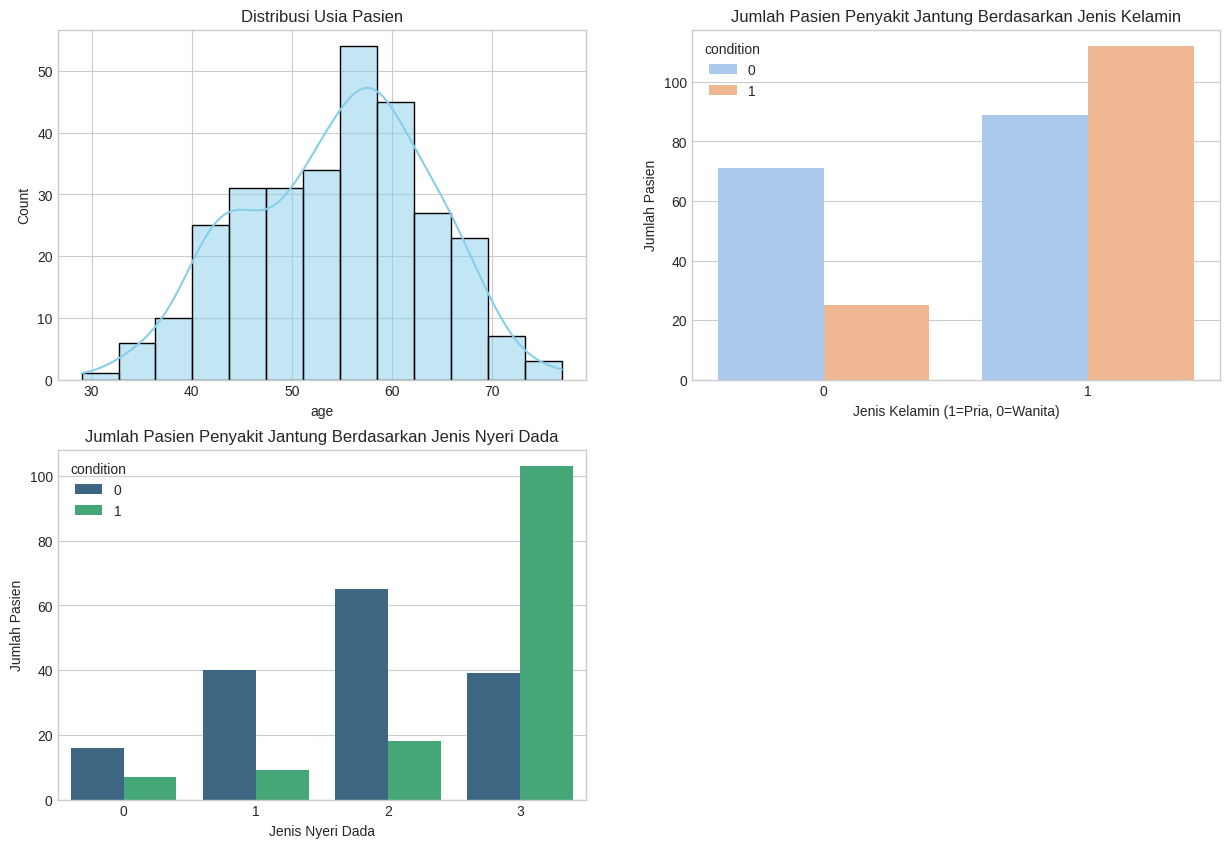

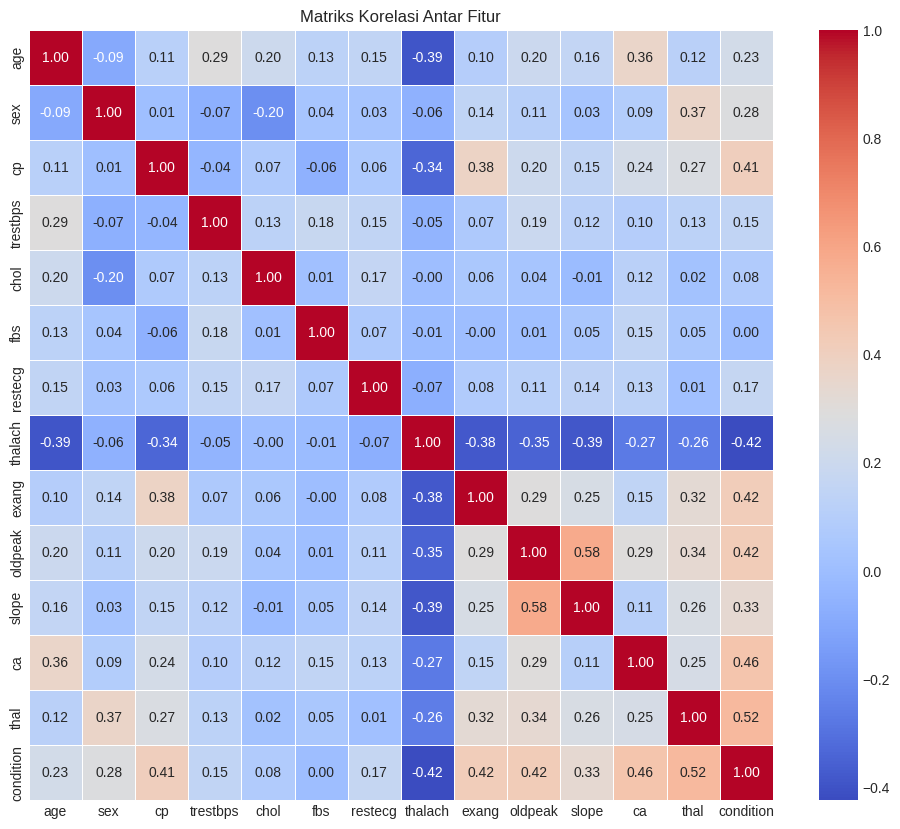

In [7]:
if df is not None:
# 4. EKSPLORASI DATA AWAL & VISUALISASI
    # --------------------------------------------------------------------------
    print("\n" + "="*50)
    print("4. Eksplorasi Data Awal (EDA)")
    print("="*50)

    # Menampilkan 5 baris pertama
    print("\n5 Baris Pertama Dataset:")
    print(df.head())

    # Menampilkan informasi ringkas
    print("\nInformasi Dataset:")
    df.info()

    # Menampilkan statistik deskriptif
    print("\nStatistik Deskriptif:")
    print(df.describe())

    # Memeriksa nilai yang hilang
    print("\nJumlah Nilai Hilang per Kolom:")
    print(df.isnull().sum())

    print("\nMelakukan visualisasi data...")
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(15, 10))

    # Visualisasi distribusi 'age'
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='age', kde=True, color='skyblue')
    plt.title('Distribusi Usia Pasien')

    # Visualisasi hubungan 'sex' dan 'condition'
    plt.subplot(2, 2, 2)
    sns.countplot(x='sex', hue='condition', data=df, palette='pastel')
    plt.title('Jumlah Pasien Penyakit Jantung Berdasarkan Jenis Kelamin')
    plt.xlabel('Jenis Kelamin (1=Pria, 0=Wanita)')
    plt.ylabel('Jumlah Pasien')

    # Visualisasi hubungan 'cp' dan 'condition'
    plt.subplot(2, 2, 3)
    sns.countplot(x='cp', hue='condition', data=df, palette='viridis')
    plt.title('Jumlah Pasien Penyakit Jantung Berdasarkan Jenis Nyeri Dada')
    plt.xlabel('Jenis Nyeri Dada')
    plt.ylabel('Jumlah Pasien')

    # Visualisasi Matriks Korelasi
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriks Korelasi Antar Fitur')
    plt.show()

In [32]:
    # 5. RINGKASAN DAN WAWASAN DENGAN BANTUAN AI (IBM Granite)
    # --------------------------------------------------------------------------
    if REPLICATE_API_TOKEN:
        print("\n" + "="*50)
        print("5. Analisis dengan Dukungan AI (IBM Granite)")
        print("="*50)

        # Siapkan deskripsi data dan temuan
        descriptive_stats_text = df.describe().to_markdown()
        correlation_matrix_text = df.corr().to_markdown()

        # Prompt untuk meringkas temuan
        prompt_ringkasan = f"""
        Anda adalah seorang ahli analitik data. Berikut adalah hasil dari analisis eksplorasi data pada dataset penyakit jantung:

        1. Statistik Deskriptif:
        {descriptive_stats_text}

        2. Matriks Korelasi:
        {correlation_matrix_text}

        Berdasarkan data di atas, ringkaslah temuan-temuan utama (terutama yang terkait dengan variabel 'condition') dan jelaskan pola serta korelasi yang signifikan.
        """

        # Prompt untuk memberikan wawasan lebih lanjut
        prompt_wawasan = f"""
        Berdasarkan ringkasan dan analisis dari data penyakit jantung yang telah dilakukan sebelumnya, berikan rekomendasi konkret dan actionable untuk audiens non-teknis. Fokuskan pada hal-hal yang dapat mereka lakukan untuk meningkatkan kesadaran akan faktor risiko penyakit jantung. Sajikan rekomendasi dalam format poin-poin yang mudah dipahami.
        """

        # Fungsi untuk memanggil model
        def call_llm(prompt):
            try:
                print(f"Memanggil model IBM Granite untuk prompt: '{prompt[:50]}...'")
                output = replicate.run(
                    "ibm-granite/granite-3.3-8b-instruct",
                    input={"prompt": prompt, "max_new_tokens": 512, "temperature": 0.7}
                )
                full_response = "".join(output)
                print("Jawaban dari IBM Granite:")
                print("="*25)
                print(textwrap.fill(full_response, width=80))
                print("="*25)
            except replicate.exceptions.ReplicateError as e:
                print(f"Terjadi kesalahan saat memanggil API Replicate: {e}")
                print("Pastikan token API Anda benar dan Anda memiliki akses ke model.")
            except Exception as e:
                print(f"Terjadi kesalahan tak terduga: {e}")

        # Panggil LLM untuk ringkasan temuan
        call_llm(prompt_ringkasan)

        # Panggil LLM untuk wawasan dan rekomendasi
        call_llm(prompt_wawasan)

    else:
        print("\nAPI token tidak tersedia, bagian analisis AI dilewati.")


5. Analisis dengan Dukungan AI (IBM Granite)
Memanggil model IBM Granite untuk prompt: '
    Anda adalah seorang ahli analitik data. Berik...'
Jawaban dari IBM Granite:
Berdasarkan analisis eksplorasi data tersebut, berikut ini adalah beberapa
temuan-temuan utama dan pola yang signifikan, terutama yang terkait dengan
variabel 'condition':  1. **Pola Demografis**:     - **Usia**: Mean usia pasien
adalah 54,54 tahun dengan standar deviasi 9,05 tahun. Minimal usia adalah 29
tahun dan maksimalnya 77 tahun.    - **Jenis Kelamin**: Kejadian laki-laki (sex
= 1) lebih dominan dengan jumlah 149 dari 297 pasien.  2. **Pola Klinis**:    -
**Tingkat Tingkat Sistolik Dada (trestbps)**: Mean tingkat tingkat sistolik dada
adalah 131,69 mmHg dengan standar deviasi 17,76.    - **Kolesterol (chol)**:
Mean kolesterol pasien adalah 247,35 mg/dL dengan standar deviasi 51,9976.    -
**Fungsi Beta-Celulitis (fbs)**: Lebih dari 80% pasien memiliki nilai fbs yang
menunjukkan normal (fbs = 0).    - **Faktor Ri

In [ ]:
    # 6. KESIMPULAN
    # --------------------------------------------------------------------------
    print("\n" + "="*50)
    print("6. Kesimpulan")
    print("="*50)
    print("Notebook ini berhasil memuat dan mengeksplorasi dataset.")
    print("Semua kode yang tertera di notebook ini sudah mencakup Analytical Result, Insight & Findings, serta Recommendations.")
    print("Visualisasi awal menunjukkan hubungan antara beberapa fitur dan kondisi jantung.")
    print("Model AI IBM Granite telah digunakan untuk meringkas temuan dan memberikan wawasan.")
    print("Hasil ini dapat digunakan untuk mengisi bagian 'Wawasan & Temuan' dan 'Kesimpulan & Rekomendasi' di file README.md.")
    print("Langkah selanjutnya adalah mendokumentasikan temuan ini dan membuat slide presentasi.")




6. Kesimpulan
Notebook ini berhasil memuat dan mengeksplorasi dataset.
Semua kode yang tertera di notebook ini sudah mencakup Analytical Result, Insight & Findings, serta Recommendations.
Visualisasi awal menunjukkan hubungan antara beberapa fitur dan kondisi jantung.
Model AI IBM Granite telah digunakan untuk meringkas temuan dan memberikan wawasan.
Hasil ini dapat digunakan untuk mengisi bagian 'Wawasan & Temuan' dan 'Kesimpulan & Rekomendasi' di file README.md.
Langkah selanjutnya adalah mendokumentasikan temuan ini dan membuat slide presentasi.
